# Tóm tắt thuật toán
Tới đây tôi xin được tóm tắt lại thuật toán (đặc biệt quan trọng với các bạn bỏ qua phần toán học bên trên) như sau:

+Đầu vào: Dữ liệu X và số lượng cluster cần tìm K

+Đầu ra: Các center M và label vector cho từng điểm dữ liệu Y

+ Chọn K điểm bất kỳ làm các center ban đầu.
+ Phân mỗi điểm dữ liệu vào cluster có center gần nó nhất.
+ Nếu việc gán dữ liệu vào từng cluster ở bước 2 không thay đổi so với vòng lặp trước nó thì ta dừng thuật toán.
+ Cập nhật center cho từng cluster bằng cách lấy trung bình cộng của tất các các điểm dữ liệu đã được gán vào cluster đó sau bước 2.
+ Quay lại bước 2.


#### B1: Chọn center cho từng cluster và tạo dữ liệu cho từng cluster bằng cách lấy mẫu theo phân phối chuẩn có kỳ vọng là center của cluster đó và ma trận hiệp phương sai (covariance matrix) là ma trận đơn vị.

In [ ]:
# Library 
import numpy as np
import matplotlib.pyplot as plt 
from scipy.spatial.distance import cdist      # tính khoảng cách giữa 2 cặp điểm 

In [103]:
# Tạo dữ liệu center (2,2) (8,3) (3,6)
np.random.seed(11)
means = [[2,2], [8,3], [3,6] ]
cov = [ [1,0], [0, 1]]       # ma trận hiệp phương sai là ma trận đơn vị 
N = 500  #mỗi center có 500 điểm 

X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)

X = np.concatenate((X0, X1, X2), axis = 0)     # nối chồng lên nhau (2 cột )
K = 3  # số lượng center 
original_label = np.asarray([0] * N + [1] * N + [2] * N).T     # đánh nhãn cho tập dữ liệu X,  [i] * N (ma trận N hàng giá trị i ) -> return 1 mảng 1 chiều 



In [136]:
# display data
def kmeans_display(X, label):
    K = np.amax(label) + 1                    # np.amax(array): trả về giá trị max của 1 mảng 
    X0 = X[label == 0, :]                          # lấy các hàng có label 0
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]
    
    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 4, alpha = .8)

    plt.axis('equal')
    plt.plot()
    plt.show()
    

#### Viết các hàm:

1. kmeans_init_centers để khởi tạo các centers ban đầu.
2. kmeans_asign_labels để gán nhán mới cho các điểm khi biết các centers.
3. kmeans_update_centers để cập nhật các centers mới dữa trên dữ liệu vừa được gán nhãn.
4. has_converged để kiểm tra điều kiện dừng của thuật toán.
 

In [105]:
# khởi tạo các centers ban đầu.
def kmeans_init_centers(X, k):
    # random pick k rows of X as initial centers 
    return X[np.random.choice(X.shape[0], k, replace=False)]


In [115]:
# gán nhán mới cho các điểm khi biết các centers.
def kmeans_assign_labels(X, centers):
    # calculate pairwise distance btw data and centers 
    D = cdist(X, centers)                # return matrix k hàng * 1 cột : mỗi hàng là khoảng cách từ điểm đó đến lần lượt 3 center
    
    
    # return index of the closest center : new labels 
    return np.argmin(D, axis=1)                # axis=1 ứng với cột 

In [134]:
# cập nhật các centers mới dữa trên dữ liệu vừa được gán nhãn.
def kmeans_update_centers(X, labels, K):
    centers = np.zeros( (K, X.shape[1]) )   #khởi tạo matrix 0  K hàng, 2 cột 
    for k in range(K):
        #collection all points assigned to the k-th cluster
        Xk = X[labels == k, :]
        # take average (lấy trung bình cộng)
        centers[k, :] = np.mean(Xk, axis=0)   # theo trục dọc : kết quả trả về [x,y]
        
    return centers


In [160]:
# kiểm tra điều kiện dừng của thuật toán.
def kmeans_has_coveraged(centers, new_centers):
    # return true if two sets of centers are the same 
    return (set([tuple(a) for a in centers]) == set([tuple(a) for a in new_centers]))

In [163]:
# Kmean algorithrm 
def kmeans(X, K):
    centers = kmeans_init_centers(X, K)  
    labels = []
    it = 0
    
    while True:
        labels = kmeans_asign_labels(X, centers) 
        new_centers = kmeans_update_centers(X, labels, K)
        if kmeans_has_coveraged(centers, new_centers):
            break
        centers = new_centers
        it += 1
        
    return (centers, labels, it)


[[4.35142894 1.82573544 4.54461451]
 [2.50007646 3.98528905 7.74432068]
 [2.64538268 1.62535358 6.11030708]
 ...
 [5.27368081 1.93480009 5.08923007]
 [7.11732213 3.57546497 4.62715515]
 [6.66311382 3.69474597 5.89031345]]
[1 0 1 ... 1 1 1]
[[ 3.74945474  1.713927  ]
 [ 1.51543487 -0.65331856]
 [ 1.99171537  1.68036864]
 ...
 [ 2.56402984  5.10138061]
 [ 3.62998852  6.60564711]
 [ 2.31894139  6.84856953]]
[1 0 1 ... 1 1 1]
[[ 3.74945474  1.713927  ]
 [ 1.51543487 -0.65331856]
 [ 1.99171537  1.68036864]
 ...
 [ 2.56402984  5.10138061]
 [ 3.62998852  6.60564711]
 [ 2.31894139  6.84856953]]
[1 0 1 ... 1 1 1]
[[ 3.74945474  1.713927  ]
 [ 1.51543487 -0.65331856]
 [ 1.99171537  1.68036864]
 ...
 [ 2.56402984  5.10138061]
 [ 3.62998852  6.60564711]
 [ 2.31894139  6.84856953]]
[[2.94723557 2.83306919 4.40631206]
 [2.03785375 5.10299919 7.45461249]
 [1.22694146 2.72228207 6.09854424]
 ...
 [4.20481356 0.78261256 5.66427866]
 [6.02462636 2.48593947 5.46252367]
 [5.77421405 2.5465713  6.66826814]

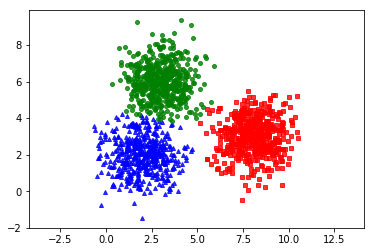

In [166]:
(centers, labels, it) = kmeans(X, K)
print('Centers found by our algorithm:')
print(centers)

kmeans_display(X, labels)

Centers found by scikit-learn:
[[8.0410628  3.02094748]
 [2.99357611 6.03605255]
 [1.97634981 2.01123694]]


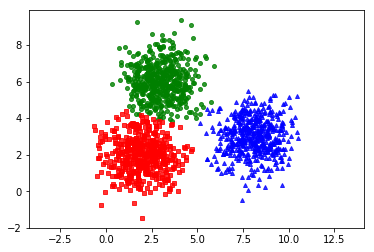

In [168]:
# Use scikit-learn library 
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
print('Centers found by scikit-learn:')
print(kmeans.cluster_centers_)
pred_label = kmeans.predict(X)
kmeans_display(X, pred_label)